In [1]:
#加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set=pd.read_csv('cs-training.csv')
print('train_set shape:', train_set.shape)
train_set.head()

train_set shape: (150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
train_set.describe

<bound method NDFrame.describe of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-5

In [4]:
# 去除匿名列
train_set.drop('Unnamed: 0',axis=1,inplace=True)
train_set.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
#列名重命名
NewColName={
         'SeriousDlqin2yrs':'Isdlq',
         'RevolvingUtilizationOfUnsecuredLines':'Revol',
         'NumberOfTime30-59DaysPastDueNotWorse':'Num30-59late',
         'NumberOfOpenCreditLinesAndLoans':'Numopen',
         'NumberOfTimes90DaysLate':'Num90late',
         'NumberRealEstateLoansOrLines':'Numestate',
         'NumberOfTime60-89DaysPastDueNotWorse':'Num60-89late',
         'NumberOfDependents':'Numdepend'}
train_set.rename(columns=NewColName,inplace=True)
train_set.head()

,Isdlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,Numopen,Num90late,Numestate,Num60-89late,Numdepend
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
#获得每列数据缺失值个数
missing_values_count=train_set.isnull().sum().sort_values(ascending=False)
missing_values_count
#缺失现象不严重 可以不用删除缺失行

MonthlyIncome    29731
Numdepend         3924
Num60-89late         0
Numestate            0
Num90late            0
Numopen              0
DebtRatio            0
Num30-59late         0
age                  0
Revol                0
Isdlq                0
dtype: int64

In [7]:
#Numdepend  MonthlyIncomey有缺失值
#看一下MonthlyIncome和Numdepend的缺失是否有关联
train_set.loc[(train_set['Numdepend'].isnull())&(train_set['MonthlyIncome'].isnull()),:].shape[0]

3924

In [8]:
#计算相关度
corr = train_set.corr()
corr

,Isdlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,Numopen,Num90late,Numestate,Num60-89late,Numdepend
Isdlq,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
Revol,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
Num30-59late,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
Numopen,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
Num90late,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
Numestate,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
Num60-89late,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


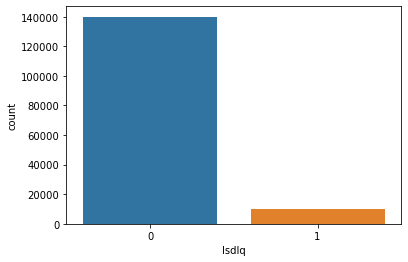

In [9]:
#显示好坏比
sns.countplot('Isdlq',data=train_set)
plt.show()

In [10]:
#好坏比不平衡
badNum=train_set.loc[train_set['Isdlq']==1,:].shape[0]
goodNum=train_set.loc[train_set['Isdlq']==0,:].shape[0]
print('好坏比:{0}%'.format(round(badNum*100/(goodNum+badNum),2)))

好坏比:6.68%


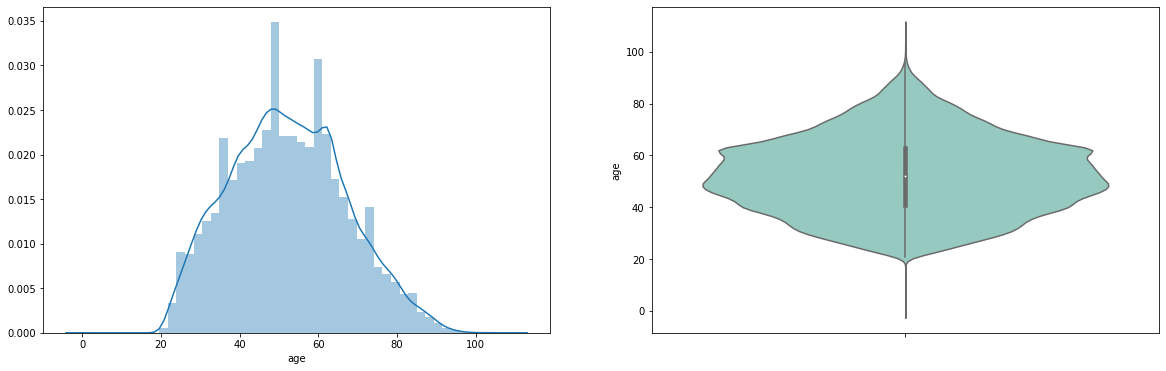

In [11]:
#检查Age分布情况
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
#分布图
sns.distplot(train_set['age'],ax=ax1)

#绘制箱线图和内核密度估计值的组合
sns.violinplot(y='age',data=train_set,ax=ax2,palette="Set3")#ch:2.5,-.2,dark=.3
plt.show()
#可以看出age的分布基本符合正态分布，但含有异常值

In [12]:
#异常值情况
age_mean=train_set['age'].mean()
age_std=train_set['age'].std()
age_lowlimit=age_mean-3*age_std
age_uplimit=age_mean+3*age_std
print('异常值下限：',age_lowlimit,'异常值上限：',age_uplimit)

异常值下限： 7.979609077365616 异常值上限： 96.61080425596771


In [13]:
#筛选异常值
age_lowlimitd=train_set.loc[train_set['age']<age_lowlimit,:]
age_uplimitd=train_set.loc[train_set['age']>age_uplimit,:]
print('异常值下限比例：{0}%'.format(age_lowlimitd.shape[0]*100/train_set.shape[0]),
     '异常值上限比例：{0}%'.format(age_uplimitd.shape[0]*100/train_set.shape[0]))

异常值下限比例：0.0006666666666666666% 异常值上限比例：0.03%


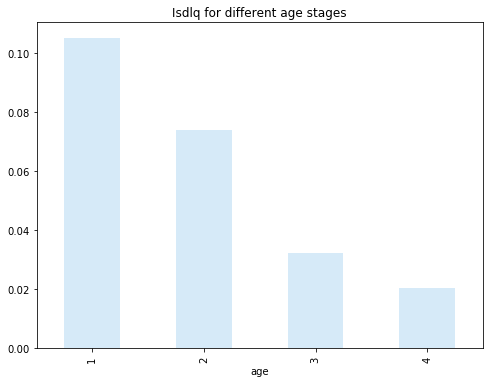

In [14]:
data_age=train_set.loc[train_set['age']>0,['age','Isdlq']]
data_age.loc[(data_age['age']>18)&(data_age['age']<40),'age'] = 1
data_age.loc[(data_age['age']>=40)&(data_age['age']<60),'age'] = 2 
data_age.loc[(data_age['age']>=60)&(data_age['age']<80),'age'] = 3
data_age.loc[(data_age['age']>=80),'age'] = 4
age_Isdlq=data_age.groupby('age')['Isdlq'].sum()
age_total=data_age.groupby('age')['Isdlq'].count()
age_Isratio=age_Isdlq/age_total
#index_ls = ['<=18','18-49','40-60','60-80']
#plt.xticks(index_ls) 

plt.title('Isdlq for different age stages')
age_Isratio.plot(kind='bar',figsize=(8,6),color='#D6EAF8')

plt.show()

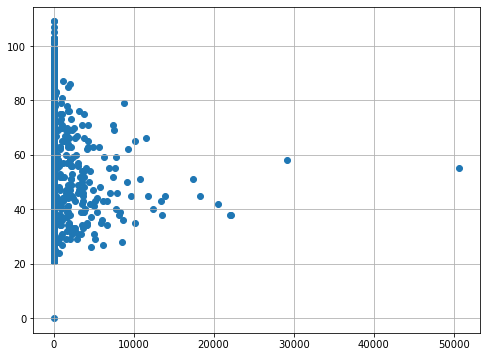

In [15]:
#Rovel
figure=plt.figure(figsize=(8,6))
plt.scatter(train_set['Revol'],train_set['age'])
plt.grid()

In [16]:
percent_25=np.percentile(train_set['Revol'],25)
percent_75=np.percentile(train_set['Revol'],75)
Revol_lowlimit=percent_25-1.5*(percent_75-percent_25)
Revol_uplimit=percent_75+1.5*(percent_75-percent_25)
print('异常值下限值：',Revol_lowlimit,'异常值上限值：',Revol_uplimit)

异常值下限值： -0.7639007662499999 异常值上限值： 1.35281445575


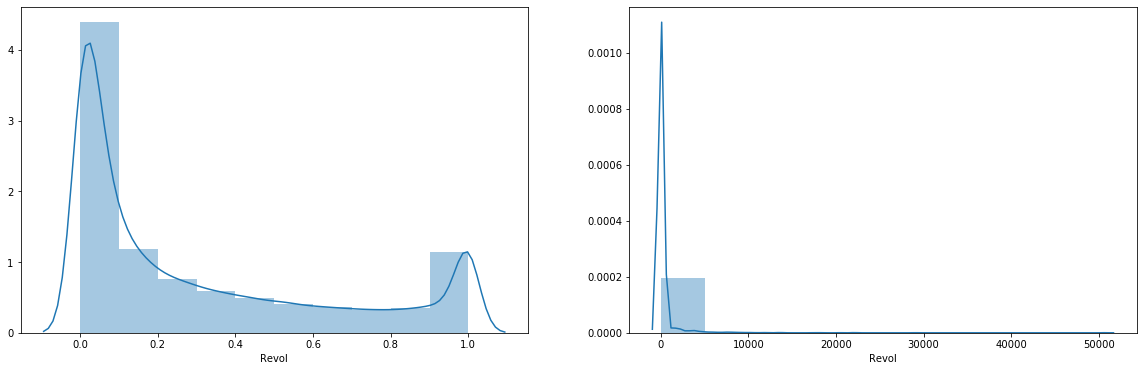

In [17]:
#将数据分为两部分，小于1和大于1的部分
data1=train_set.loc[train_set['Revol']<1,:]
data2=train_set.loc[train_set['Revol']>=1,:]
#看一下两部分数据分布情况
fig=plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.distplot(data1['Revol'],ax=ax1,bins=10)
sns.distplot(data2['Revol'],ax=ax2,bins=10)
plt.show()

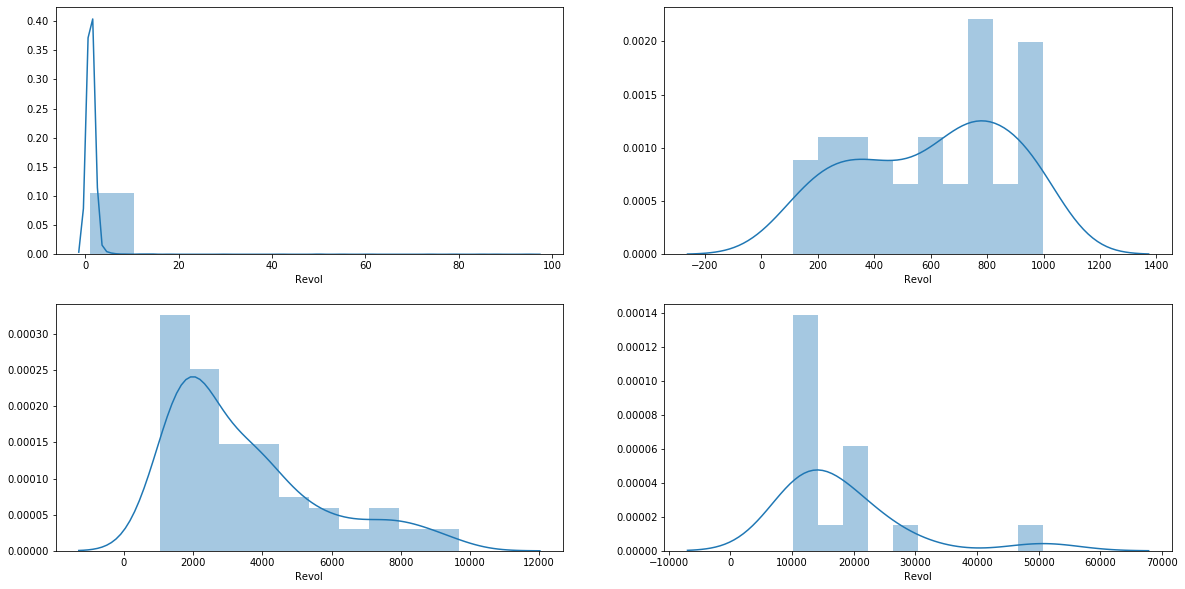

In [18]:
fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(2,2,figsize=(20,10))
sns.distplot(train_set.loc[(train_set['Revol']>=1)&(train_set['Revol']<100),'Revol'],bins=10,ax=ax1)
sns.distplot(train_set.loc[(train_set['Revol']>=100)&(train_set['Revol']<1000),'Revol'],bins=10,ax=ax2)
sns.distplot(train_set.loc[(train_set['Revol']>=1000)&(train_set['Revol']<10000),'Revol'],bins=10,ax=ax3)
sns.distplot(train_set.loc[train_set['Revol']>=10000,'Revol'],bins=10,ax=ax4)
plt.show()

In [19]:
#将区间分为（0-1），(1-10),（10-20），（20-100），（100,1000），（1000-10000），（10000,51000）看一下违约率情况
data_1=train_set.loc[(train_set['Revol']>=0)&(train_set['Revol']<1),:]
Is_1=data_1.loc[data_1['Isdlq']==1,:].shape[0]*100/data_1.shape[0]

data_2=train_set.loc[(train_set['Revol']>=1)&(train_set['Revol']<10),:]
Is_2=data_2.loc[data_2['Isdlq']==1,:].shape[0]*100/data_2.shape[0]

data_3=train_set.loc[(train_set['Revol']>=10)&(train_set['Revol']<20),:]
Is_3=data_3.loc[data_3['Isdlq']==1,:].shape[0]*100/data_3.shape[0]

data_4=train_set.loc[(train_set['Revol']>=20)&(train_set['Revol']<100),:]
Is_4=data_4.loc[data_4['Isdlq']==1,:].shape[0]*100/data_4.shape[0]

data_5=train_set.loc[(train_set['Revol']>=100)&(train_set['Revol']<1000),:]
Is_5=data_5.loc[data_5['Isdlq']==1,:].shape[0]*100/data_5.shape[0]

data_6=train_set.loc[(train_set['Revol']>=1000)&(train_set['Revol']<10000),:]
Is_6=data_6.loc[data_6['Isdlq']==1,:].shape[0]*100/data_6.shape[0]

data_7=train_set.loc[(train_set['Revol']>=10000)&(train_set['Revol']<51000),:]
Is_7=data_7.loc[data_7['Isdlq']==1,:].shape[0]*100/data_7.shape[0]

print(' 0-1违约率为：{0}%\n'.format(Is_1),
     '1-10违约率为：{0}%\n'.format(Is_2),
     '10-20违约率为：{0}%\n'.format(Is_3), 
     '20-100违约率为：{0}%\n'.format(Is_4),
     '100-1000违约率为：{0}%\n'.format(Is_5),
     '1000-10000违约率为：{0}%\n'.format(Is_6),
     '10000-51000违约率为：{0}%\n'.format(Is_7))

 0-1违约率为：5.989963317014633%
 1-10违约率为：39.52211817888279%
 10-20违约率为：57.142857142857146%
 20-100违约率为：18.181818181818183%
 100-1000违约率为：1.9607843137254901%
 1000-10000违约率为：6.410256410256411%
 10000-51000违约率为：0.0%



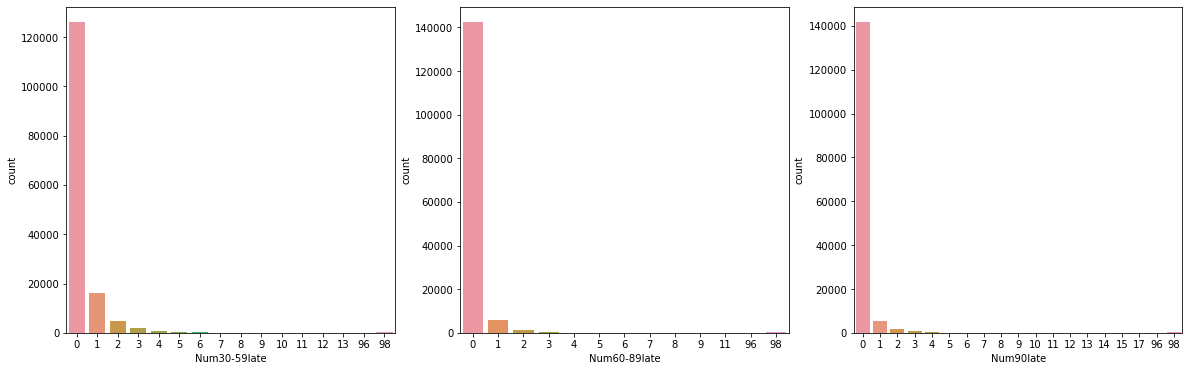

In [20]:
#Num30-59late Num60-89late Num90late

fig,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(20,6))
sns.countplot(train_set['Num30-59late'],ax=ax1)
sns.countplot(train_set['Num60-89late'],ax=ax2)
sns.countplot(train_set['Num90late'],ax=ax3)
#可见>90的有异常值

plt.show()

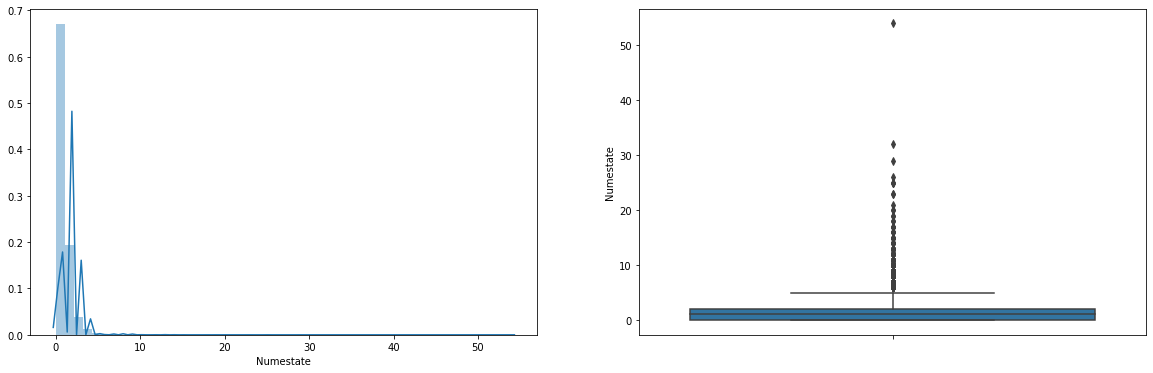

In [21]:
#numstate
#数据分布
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.distplot(train_set['Numestate'],ax=ax1)
sns.boxplot(y=train_set['Numestate'],ax=ax2)

plt.show()

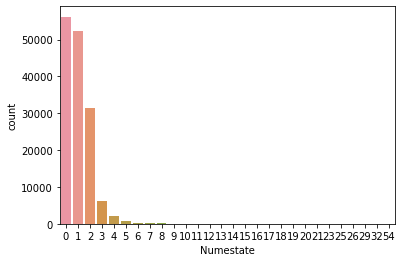

In [22]:
#各数据点数据大小分布
sns.countplot(train_set['Numestate'])
plt.show()

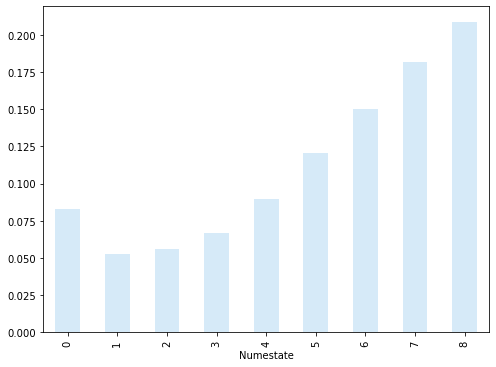

In [23]:
#将大于8的数据和8合并后看一下违约率的情况
train_set.loc[train_set['Numestate']>8,'Numestate']=8
Numestate_dlq=train_set.groupby(['Numestate'])['Isdlq'].sum()
Numestate_total=train_set.groupby(['Numestate'])['Isdlq'].count()
Numestate_dlqratio=Numestate_dlq/Numestate_total
Numestate_dlqratio.plot(kind='bar',figsize=(8,6),color='#D6EAF8')
plt.show()

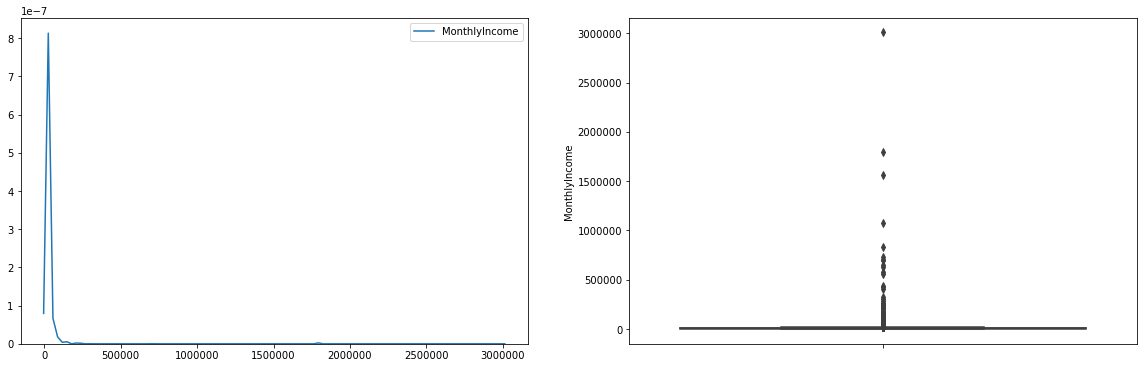

In [24]:
#MonthlyIncome数据分布
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(20,6))
sns.kdeplot(train_set['MonthlyIncome'],ax=ax1)
sns.boxplot(y=train_set['MonthlyIncome'],ax=ax2)
plt.show()

In [25]:
#数据清洗


In [26]:
#age异常值处理
train_set=train_set[train_set['age']>0]

#Num30-59late Num60-89late Num90late异常值处理
train_set=train_set[train_set['Num30-59late']<90]
train_set=train_set[train_set['Num60-89late']<90]
train_set=train_set[train_set['Num90late']<90]

#Numestate异常值处理
train_set=train_set[train_set['Numestate']<50]

In [27]:
#Numdepend缺失值处理
train_set['Numdepend']=train_set['Numdepend'].fillna('0')

#MonthlyIncome缺失值处理
#随机森林预测缺失值
data_Forest=train_set.iloc[:,[5,1,2,3,4,6,7,8,9]]
MonthlyIncome_isnull=data_Forest.loc[train_set['MonthlyIncome'].isnull(),:]
MonthlyIncome_notnull=data_Forest.loc[train_set['MonthlyIncome'].notnull(),:]

from sklearn.ensemble import RandomForestRegressor
X=MonthlyIncome_notnull.iloc[:,1:].values
y=MonthlyIncome_notnull.iloc[:,0].values
regr=RandomForestRegressor(max_depth=3, random_state=0,n_estimators=200,n_jobs=-1)
regr.fit(X,y)
MonthlyIncome_fillvalue=regr.predict(MonthlyIncome_isnull.iloc[:,1:].values).round(0)

#填充MonthlyIncome缺失值
train_set.loc[train_set['MonthlyIncome'].isnull(),'MonthlyIncome']=MonthlyIncome_fillvalue


In [28]:
#衍生变量
train_set['AllNumlate']=train_set['Num30-59late']+train_set['Num60-89late']+train_set['Num90late']
train_set['Monthlypayment']=train_set['DebtRatio']*train_set['MonthlyIncome']
train_set['Withdepend']=train_set['Numdepend']

In [29]:
#数据类型转换
train_set['Numdepend']=train_set['Numdepend'].astype('int64')
train_set['Withdepend']=train_set['Withdepend'].astype('int64')
train_set['MonthlyIncome']=train_set['MonthlyIncome'].astype('int64')
train_set['Monthlypayment']=train_set['Monthlypayment'].astype('int64')

In [30]:
#Revol分箱
train_set.loc[(train_set['Revol']<1),'Revol']=0
train_set.loc[(train_set['Revol']>1)&(train_set['Revol']<=20),'Revol']=1
train_set.loc[(train_set['Revol']>20),'Revol']=0#根据前文EDA分析，将大于20的数据与0-1的数据合并

#DebtRatio分箱
train_set.loc[(train_set['DebtRatio']<1),'DebtRatio']=0
train_set.loc[(train_set['DebtRatio']>1)&(train_set['DebtRatio']<2),'DebtRatio']=1
train_set.loc[(train_set['DebtRatio']>=2),'DebtRatio']=0

#Num30-59late/Num60-89late/Num90late/Numestate/Numdepend
train_set.loc[(train_set['Num30-59late']>=8), 'Num30-59late'] = 8
train_set.loc[(train_set['Num60-89late']>=7), 'Num60-89late'] = 7
train_set.loc[(train_set['Num90late']>=10), 'Num90late'] = 10
train_set.loc[(train_set['Numestate']>=8), 'Numestate'] = 8
train_set.loc[(train_set['Numdepend']>=7), 'Numdepend'] = 7

#AllNumlate分箱
train_set.loc[(train_set['AllNumlate']>1),'AllNumlate']=1#分为逾期和未逾期两种情况

#Withdepend分箱
train_set.loc[(train_set['Withdepend']>1),'Withdepend']=1#分为独生子女和非独生子女

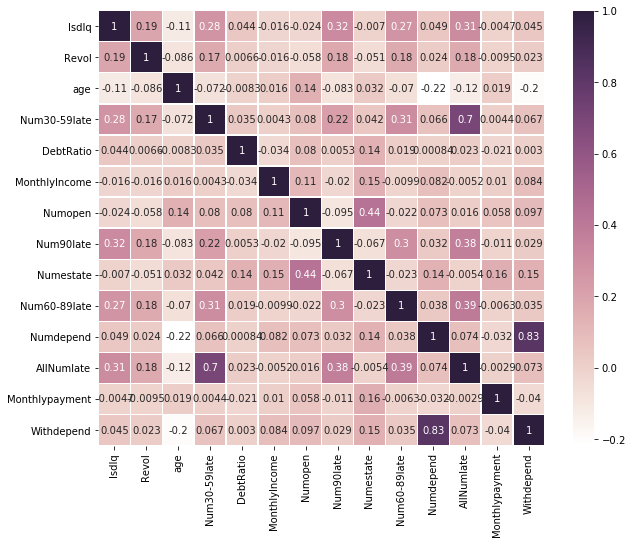

In [31]:
corr=train_set.corr()
plt.figure(figsize=(10,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(corr,annot=True,linewidths=.3,cmap=cmap)

plt.show()

In [32]:
def bin_woe(tar, var, n=None, cat=None):
    """
    连续自变量分箱,woe,iv变换
    tar:target目标变量
    var:进行woe,iv转换的自变量
    n:分组数量
    """
    total_bad = tar.sum()
    total_good =tar.count()-total_bad
    totalRate = total_good/total_bad
    
    if cat == 's':
        msheet = pd.DataFrame({tar.name:tar,var.name:var,'var_bins':pd.qcut(var, n, duplicates='drop')})
        grouped = msheet.groupby(['var_bins'])
    elif (cat == 'd') and (n is None):
        msheet = pd.DataFrame({tar.name:tar,var.name:var})
        grouped = msheet.groupby([var.name])
        
    groupBad = grouped.sum()[tar.name]
    groupTotal = grouped.count()[tar.name]
    groupGood = groupTotal - groupBad
    groupRate = groupGood/groupBad
    groupBadRate = groupBad/groupTotal
    groupGoodRate = groupGood/groupTotal

    woe = np.log(groupRate/totalRate)
    iv = np.sum((groupGood/total_good-groupBad/total_bad)*woe)
    
    if cat == 's':
        new_var, cut = pd.qcut(var, n, duplicates='drop',retbins=True, labels=woe.tolist())
    elif cat == 'd':
        dictmap = {}
        for x in woe.index:
            dictmap[x] = woe[x]
        new_var, cut = var.map(dictmap), woe.index
    
    return woe.tolist(), iv, cut, new_var

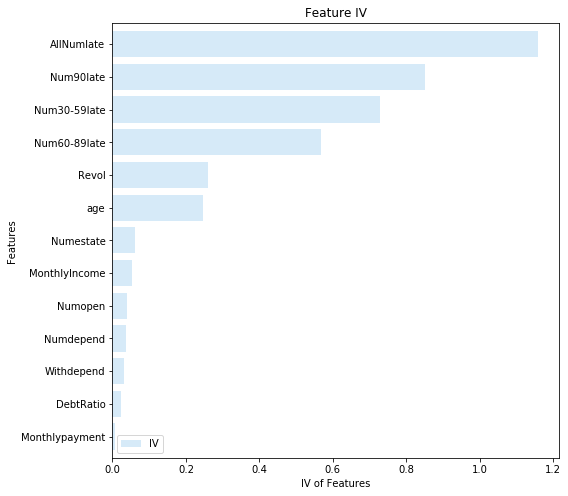

In [33]:
# 确定变量类型，连续变量还是离散变量
dvar = ['Revol','DebtRatio','Num30-59late', 'Num60-89late','Num90late','AllNumlate','Withdepend',
        'Numestate','Numdepend']
svar = ['MonthlyIncome','age','Monthlypayment','Numopen']

# 可视化woe得分和iv得分
def woe_vs(data):
    cutdict = {}
    ivdict = {}
    woe_dict = {}
    woe_var = pd.DataFrame()
    for var in data.columns:
        if var in dvar:
            woe, iv, cut, new = bin_woe(data['Isdlq'], data[var], cat='d')
            woe_dict[var] = woe
            woe_var[var] = new
            ivdict[var] = iv
            cutdict[var] = cut
        elif var in svar:
            woe, iv, cut, new = bin_woe(data['Isdlq'], data[var], n=5, cat='s')
            woe_dict[var] = woe
            woe_var[var] = new
            ivdict[var] = iv
            cutdict[var] = cut
            
    ivdict = sorted(ivdict.items(), key=lambda x:x[1], reverse=False)
    iv_vs = pd.DataFrame([x[1] for x in ivdict],index=[x[0] for x in ivdict],columns=['IV'])
    ax = iv_vs.plot(kind='barh',
                    figsize=(8,8),
                    title='Feature IV',
                    fontsize=10,
                    width=0.8,
                    color='#D6EAF8')
    ax.set_ylabel('Features')
    ax.set_xlabel('IV of Features')
    
    return ivdict, woe_var, woe_dict, cutdict

# woe转化
ivinfo, woe_data, woe_dict, cut_dict = woe_vs(train_set)

In [34]:
# 1.筛选出IV值大于0.1的变量：'Num30-59late'，'Num60-89late'，'Num90late'，'AllNumlate'，'Revol'，'age'；
# 2.从以上看出，'Num30-59late'与'AllNumlate'具有强相关性（0.7），两者取IV值较高者'AllNumlate'
# 3.清洗后选用特征 ['Num60-89late','Num90late','AllNumlate','Revol','age']

# 构建模型

## Classifier with feature engineering

这一部分将根据上述特征工程分析，筛选出清洗后的`Num6089late`,`Num90late`,`AllNumlate`,`Revol`,`age`这五个特征作为分类模型的输入，并观察分类效果

### 划分数据集

In [35]:
# 划分训练集和验证集
from sklearn.model_selection import train_test_split
IV_info = ['Num60-89late', 'Num90late', 'AllNumlate', 'Revol', 'age']
X = woe_data[IV_info].values
Y = train_set['Isdlq'].values

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, random_state=42)
print('X_train shape:', X_train.shape)
print(X_train)
print('Y_train shape:', Y_train.shape)
print(Y_train, '\n')
print('X_validation shape:', X_validation.shape)
print(X_validation)
print('Y_validation shape:', Y_validation.shape)
print(Y_validation)


X_train shape: (112297, 5)
[[0.27430888747172566 0.3758252287402818 0.9236808344475159
  0.1192313100488483 1.0541680947582983]
 [0.27430888747172566 0.3758252287402818 -1.3834422631890684
  0.1192313100488483 -0.4871831280687727]
 [0.27430888747172566 0.3758252287402818 0.9236808344475159
  0.1192313100488483 1.0541680947582983]
 ...
 [0.27430888747172566 0.3758252287402818 0.9236808344475159
  0.1192313100488483 -0.07829209771025719]
 [0.27430888747172566 0.3758252287402818 0.9236808344475159
  0.1192313100488483 -0.25255703624491094]
 [0.27430888747172566 -1.9718595525316482 -1.3834422631890684
  0.1192313100488483 -0.25255703624491094]]
Y_train shape: (112297,)
[0 0 0 ... 0 0 1] 

X_validation shape: (37433, 5)
[[0.27430888747172566 0.3758252287402818 -1.3834422631890684
  0.1192313100488483 -0.25255703624491094]
 [0.27430888747172566 0.3758252287402818 0.9236808344475159
  0.1192313100488483 -0.25255703624491094]
 [0.27430888747172566 0.3758252287402818 0.9236808344475159
  0.1192

### lightgbm

In [36]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_val = lgb.Dataset(X_validation, Y_validation)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'num_leaves': 15,
    'max_depth': -1,
    'min_data_in_leaf': 64,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
#     'lambda_l1': 1,  
#     'lambda_l2': 0.001,  # 越小l2正则程度越高
#     'min_gain_to_split': 0.2,
    'verbose': -1,
    'is_unbalance': False,
    'num_boost_round': 200
}

lgbm = lgb.train(params=params, train_set=lgb_train, valid_sets=lgb_val)

[1]	valid_0's auc: 0.80808
[2]	valid_0's auc: 0.815722
[3]	valid_0's auc: 0.816746
[4]	valid_0's auc: 0.81643


/home/gehao/anaconda3/envs/ml/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.816461
[6]	valid_0's auc: 0.817032
[7]	valid_0's auc: 0.817455
[8]	valid_0's auc: 0.817418
[9]	valid_0's auc: 0.817314
[10]	valid_0's auc: 0.817655
[11]	valid_0's auc: 0.817587
[12]	valid_0's auc: 0.817518
[13]	valid_0's auc: 0.817527
[14]	valid_0's auc: 0.81751
[15]	valid_0's auc: 0.817585
[16]	valid_0's auc: 0.81753
[17]	valid_0's auc: 0.817368
[18]	valid_0's auc: 0.81737
[19]	valid_0's auc: 0.817379
[20]	valid_0's auc: 0.817422
[21]	valid_0's auc: 0.817432
[22]	valid_0's auc: 0.817435
[23]	valid_0's auc: 0.817438
[24]	valid_0's auc: 0.817689
[25]	valid_0's auc: 0.817695
[26]	valid_0's auc: 0.817692
[27]	valid_0's auc: 0.817677
[28]	valid_0's auc: 0.817452
[29]	valid_0's auc: 0.817451
[30]	valid_0's auc: 0.817443
[31]	valid_0's auc: 0.817444
[32]	valid_0's auc: 0.81742
[33]	valid_0's auc: 0.817409
[34]	valid_0's auc: 0.817409
[35]	valid_0's auc: 0.817409
[36]	valid_0's auc: 0.817414
[37]	valid_0's auc: 0.817408
[38]	valid_0's auc: 0.817404
[39]	valid_0's auc: 0.8

In [37]:
from sklearn.metrics import roc_auc_score

Y_validation_predict_prob_lgbm = lgbm.predict(X_validation, num_iteration=lgbm.best_iteration)
print('Validation set:')
print('auc by sklearn: %.4f' % roc_auc_score(Y_validation, Y_validation_predict_prob_lgbm))
print('--------------------')
Y_train_predict_prob_lgbm = lgbm.predict(X_train, num_iteration=lgbm.best_iteration)
print('Training set:')
print('auc by sklearn: %.4f' % roc_auc_score(Y_train, Y_train_predict_prob_lgbm))

Validation set:
auc by sklearn: 0.8175
--------------------
Training set:
auc by sklearn: 0.8193


### Random forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

for i in range(5, 10):
    for j in range(10, 20):
        rfc = RandomForestClassifier(n_estimators=j, max_depth=i, random_state=0)
        rfc.fit(X_train, Y_train)
        auc_train_rfc = roc_auc_score(Y_train, rfc.predict_proba(X_train)[:,1])
        auc_val_rfc = roc_auc_score(Y_validation, rfc.predict_proba(X_validation)[:,1])
        print("estimators: %d depth: %d\t auc_train: %.4f\t auc_validation: %.4f" % \
              (j, i, auc_train_rfc, auc_val_rfc))
        

estimators: 10 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8177
estimators: 11 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8177
estimators: 12 depth: 5	 auc_train: 0.8190	 auc_validation: 0.8176
estimators: 13 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8176
estimators: 14 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8176
estimators: 15 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8176
estimators: 16 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8176
estimators: 17 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8176
estimators: 18 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8177
estimators: 19 depth: 5	 auc_train: 0.8191	 auc_validation: 0.8177
estimators: 10 depth: 6	 auc_train: 0.8193	 auc_validation: 0.8179
estimators: 11 depth: 6	 auc_train: 0.8193	 auc_validation: 0.8178
estimators: 12 depth: 6	 auc_train: 0.8193	 auc_validation: 0.8178
estimators: 13 depth: 6	 auc_train: 0.8193	 auc_validation: 0.8179
estimators: 14 depth: 6	 auc_train: 0.8193	 auc_validation: 0.

In [112]:
print("estimators: %d depth: %d\nauc_train: %.4f\nauc_validation: %.4f" % \
      (j, i, auc_train_rfc, auc_val_rfc))

estimators: 19 depth: 9
auc_train: 0.8195
auc_validation: 0.8177


### Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0,
                           solver="sag",
                           penalty="l2",
                           class_weight="balanced",
                           C=1.0,
                           max_iter=500)

LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
Y_validation_predict_prob_lr = LR.predict_proba(X_validation)[:,1]
print('Validation set:')
print('auc by sklearn: %.4f' % roc_auc_score(Y_validation, Y_validation_predict_prob_lr))
print('--------------------')
Y_train_predict_prob_lr = LR.predict_proba(X_train)[:,1]
print('Training set:')
print('auc by sklearn: %.4f' % roc_auc_score(Y_train, Y_train_predict_prob_lr))

Validation set:
auc by sklearn: 0.8177
--------------------
Training set:
auc by sklearn: 0.8182


In [73]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(0,25)
total_auc = []

for k in neighbors:
    k_value = k + 1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    knn.fit(X_train, Y_train)
    auc_knn = roc_auc_score(Y_train, knn.predict_proba(X_train)[:,1])
    total_auc.append(auc_knn)
    print('k=%d auc: %.2f' % (k_value, auc_knn))

optimal_k = neighbors[total_auc.index(max(total_auc))]
print('the optimal number of neighbors is %d with auc %.1f' % (optimal_k, total_auc[optimal_k]))

plt.plot(neighbors, total_auc)
plt.xlabel('number of neighbors K')
plt.ylabel('train auc')
plt.show()

k=1 auc: 0.59
k=2 auc: 0.66
k=3 auc: 0.69
k=4 auc: 0.70
k=5 auc: 0.71
k=6 auc: 0.74
k=7 auc: 0.75
k=8 auc: 0.75
k=9 auc: 0.76
k=10 auc: 0.76
k=11 auc: 0.76
k=12 auc: 0.76
k=13 auc: 0.76
k=14 auc: 0.76
k=15 auc: 0.77
k=16 auc: 0.78
k=17 auc: 0.78
k=18 auc: 0.78
k=19 auc: 0.78
k=20 auc: 0.78
k=21 auc: 0.78
k=22 auc: 0.78
k=23 auc: 0.78
k=24 auc: 0.79
k=25 auc: 0.79


ValueError: max() arg is an empty sequence

## Classifier with Auto-encoder

这一部分将完全舍弃IV值筛选特征这一步，而是将特征工程的初步结果(13个特征)利用神经网络进行自动特征检测和压缩，并最终获取投影到3维空间上的样本点，通过三维特征投影空间的可视化可以看出，这三个隐藏特征对样本点有比较好的区分性

feature: 13-dimension -> 3-dimension

### 取出特征工程的初步结果(13个特征)

In [42]:
woe_data

,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,Numopen,Num90late,Numestate,Num60-89late,Numdepend,AllNumlate,Monthlypayment,Withdepend
0,0.119231,-0.252557,-1.630617,0.030053,0.381751,-0.011341,0.375825,-0.915565,0.274309,-0.215403,-1.383442,0.062739,-0.205556
1,0.119231,-0.252557,0.527830,0.030053,-0.336429,-0.318443,0.375825,-0.220262,0.274309,-0.109577,0.923681,0.038744,-0.205556
2,0.119231,-0.487183,-0.917618,0.030053,-0.336429,-0.318443,-1.971860,-0.220262,0.274309,0.156999,-1.383442,0.038744,0.156999
3,0.119231,-0.487183,0.527830,0.030053,-0.336429,0.114564,0.375825,-0.220262,0.274309,0.156999,0.923681,0.038744,0.156999
4,0.119231,-0.078292,-0.917618,0.030053,0.381751,0.207705,0.375825,0.242750,0.274309,0.156999,-1.383442,0.118242,0.156999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.119231,1.054168,0.527830,0.030053,-0.033301,-0.318443,0.375825,0.242750,0.274309,0.156999,0.923681,0.038744,0.156999
149996,0.119231,-0.252557,0.527830,0.030053,-0.099435,-0.318443,0.375825,0.242750,0.274309,-0.215403,0.923681,-0.101722,-0.205556
149997,0.119231,0.430123,0.527830,0.030053,-0.033301,-0.011341,0.375825,0.242750,0.274309,0.156999,0.923681,0.062739,0.156999
149998,0.119231,-0.487183,0.527830,0.030053,-0.099435,-0.318443,0.375825,-0.220262,0.274309,0.156999,0.923681,0.038744,0.156999


In [43]:
# 以numpy的形式提取即将用于编码的特征
encode_data = woe_data.values.astype(float)
print(encode_data.shape)
encode_data

(149730, 13)


array([[ 0.11923131, -0.25255704, -1.63061732, ..., -1.38344226,
         0.06273882, -0.20555578],
       [ 0.11923131, -0.25255704,  0.52782969, ...,  0.92368083,
         0.03874424, -0.20555578],
       [ 0.11923131, -0.48718313, -0.91761846, ..., -1.38344226,
         0.03874424,  0.15699896],
       ...,
       [ 0.11923131,  0.43012338,  0.52782969, ...,  0.92368083,
         0.06273882,  0.15699896],
       [ 0.11923131, -0.48718313,  0.52782969, ...,  0.92368083,
         0.03874424,  0.15699896],
       [ 0.11923131,  0.43012338,  0.52782969, ...,  0.92368083,
         0.11824234,  0.15699896]])

### 设计Autoencoder特征提取器

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

class EncodeDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        X = self.data[index]
        X = torch.FloatTensor(X)
        Y = self.label[index]
        return X, Y
    
train_dataset = EncodeDataset(encode_data, encode_data)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=256,
    shuffle=True,
    num_workers=4
)

In [45]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(13, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 3)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 32),
            nn.Tanh(),
            nn.Linear(32, 64),
            nn.Tanh(),
            nn.Linear(64, 13)
        )
        
    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return encode, decode

In [46]:
autoencoder = AutoEncoder()
mse_loss = nn.MSELoss()
optim = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

for epoch in range(100):
    for step, (x, _) in enumerate(train_loader):
        encode, decode = autoencoder(x)
        loss = mse_loss(decode, x)
        optim.zero_grad()
        loss.backward()
        optim.step()
        if step % 100 == 0:
            print('epoch_%d step_%d loss: %.4f' % (epoch, step, loss.data.item()))

epoch_0 step_0 loss: 0.2340
epoch_0 step_100 loss: 0.0485
epoch_0 step_200 loss: 0.0464
epoch_0 step_300 loss: 0.0446
epoch_0 step_400 loss: 0.0267
epoch_0 step_500 loss: 0.0279
epoch_1 step_0 loss: 0.0307
epoch_1 step_100 loss: 0.0261
epoch_1 step_200 loss: 0.0297
epoch_1 step_300 loss: 0.0202
epoch_1 step_400 loss: 0.0252
epoch_1 step_500 loss: 0.0145
epoch_2 step_0 loss: 0.0121
epoch_2 step_100 loss: 0.0220
epoch_2 step_200 loss: 0.0136
epoch_2 step_300 loss: 0.0164
epoch_2 step_400 loss: 0.0121
epoch_2 step_500 loss: 0.0122
epoch_3 step_0 loss: 0.0118
epoch_3 step_100 loss: 0.0103
epoch_3 step_200 loss: 0.0129
epoch_3 step_300 loss: 0.0122
epoch_3 step_400 loss: 0.0119
epoch_3 step_500 loss: 0.0130
epoch_4 step_0 loss: 0.0118
epoch_4 step_100 loss: 0.0109
epoch_4 step_200 loss: 0.0114
epoch_4 step_300 loss: 0.0127
epoch_4 step_400 loss: 0.0098
epoch_4 step_500 loss: 0.0130
epoch_5 step_0 loss: 0.0105
epoch_5 step_100 loss: 0.0120
epoch_5 step_200 loss: 0.0104
epoch_5 step_300 loss:

epoch_45 step_0 loss: 0.0045
epoch_45 step_100 loss: 0.0039
epoch_45 step_200 loss: 0.0034
epoch_45 step_300 loss: 0.0041
epoch_45 step_400 loss: 0.0037
epoch_45 step_500 loss: 0.0050
epoch_46 step_0 loss: 0.0048
epoch_46 step_100 loss: 0.0040
epoch_46 step_200 loss: 0.0034
epoch_46 step_300 loss: 0.0040
epoch_46 step_400 loss: 0.0039
epoch_46 step_500 loss: 0.0036
epoch_47 step_0 loss: 0.0044
epoch_47 step_100 loss: 0.0032
epoch_47 step_200 loss: 0.0049
epoch_47 step_300 loss: 0.0044
epoch_47 step_400 loss: 0.0036
epoch_47 step_500 loss: 0.0031
epoch_48 step_0 loss: 0.0039
epoch_48 step_100 loss: 0.0034
epoch_48 step_200 loss: 0.0032
epoch_48 step_300 loss: 0.0034
epoch_48 step_400 loss: 0.0035
epoch_48 step_500 loss: 0.0037
epoch_49 step_0 loss: 0.0037
epoch_49 step_100 loss: 0.0038
epoch_49 step_200 loss: 0.0044
epoch_49 step_300 loss: 0.0033
epoch_49 step_400 loss: 0.0031
epoch_49 step_500 loss: 0.0032
epoch_50 step_0 loss: 0.0035
epoch_50 step_100 loss: 0.0033
epoch_50 step_200 lo

epoch_89 step_400 loss: 0.0031
epoch_89 step_500 loss: 0.0030
epoch_90 step_0 loss: 0.0035
epoch_90 step_100 loss: 0.0037
epoch_90 step_200 loss: 0.0027
epoch_90 step_300 loss: 0.0029
epoch_90 step_400 loss: 0.0029
epoch_90 step_500 loss: 0.0032
epoch_91 step_0 loss: 0.0036
epoch_91 step_100 loss: 0.0029
epoch_91 step_200 loss: 0.0023
epoch_91 step_300 loss: 0.0030
epoch_91 step_400 loss: 0.0033
epoch_91 step_500 loss: 0.0025
epoch_92 step_0 loss: 0.0030
epoch_92 step_100 loss: 0.0027
epoch_92 step_200 loss: 0.0027
epoch_92 step_300 loss: 0.0033
epoch_92 step_400 loss: 0.0031
epoch_92 step_500 loss: 0.0043
epoch_93 step_0 loss: 0.0027
epoch_93 step_100 loss: 0.0029
epoch_93 step_200 loss: 0.0037
epoch_93 step_300 loss: 0.0019
epoch_93 step_400 loss: 0.0033
epoch_93 step_500 loss: 0.0034
epoch_94 step_0 loss: 0.0028
epoch_94 step_100 loss: 0.0029
epoch_94 step_200 loss: 0.0026
epoch_94 step_300 loss: 0.0035
epoch_94 step_400 loss: 0.0031
epoch_94 step_500 loss: 0.0037
epoch_95 step_0 lo

### 将提取出的三维特征可视化到三维空间上

In [47]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

view_data = torch.FloatTensor(encode_data)
encode, decode = autoencoder(view_data)

X, Y, Z = encode.data[:, 0].numpy(), encode.data[:, 1].numpy(), encode.data[:, 2].numpy()
labels = train_set['Isdlq'].values

<IPython.core.display.Javascript object>


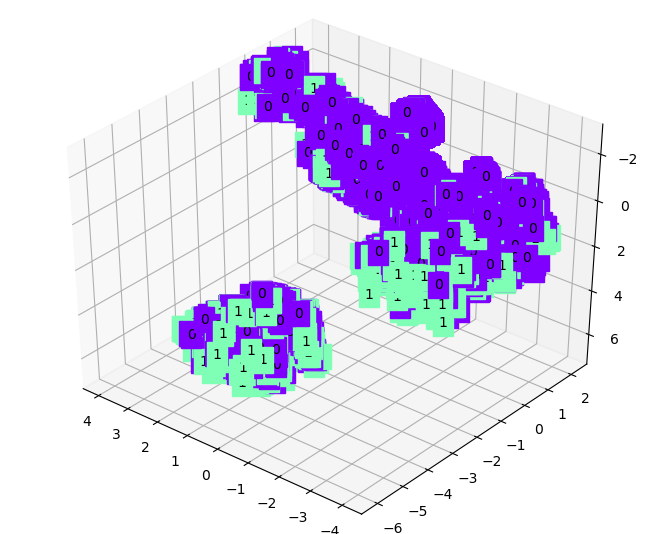

In [53]:
%matplotlib notebook

fig = plt.figure(2)
axes = Axes3D(fig)
for (x, y, z, label) in zip(X, Y, Z, labels):
    color = cm.rainbow(int(255*label/2))
    axes.text(x, y, z, label, backgroundcolor=color)

axes.set_xlim(X.min(), X.max())
axes.set_ylim(Y.min(), Y.max())
axes.set_zlim(Z.min(), Z.max())
plt.show()

### 获取新特征表示的样本点(三维)

In [56]:
new_X, _ = autoencoder(torch.FloatTensor(woe_data.values.astype(float)))
new_X

tensor([[-3.6018, -1.2595, -1.0206],
        [ 0.8723, -0.5821, -0.6867],
        [-0.2174, -5.1159,  2.3195],
        ...,
        [ 0.1358,  0.3652, -0.9996],
        [ 0.2970,  1.0603, -2.0707],
        [-0.9181,  0.1984, -0.6470]], grad_fn=<AddmmBackward>)

In [57]:
new_X = new_X.data.numpy()
new_X

array([[-3.6017618 , -1.2594821 , -1.0206321 ],
       [ 0.8722689 , -0.58210766, -0.6867249 ],
       [-0.21738991, -5.115851  ,  2.3195128 ],
       ...,
       [ 0.13582233,  0.36521545, -0.9996461 ],
       [ 0.2969793 ,  1.0602659 , -2.0706792 ],
       [-0.9181442 ,  0.19841841, -0.6469534 ]], dtype=float32)

### 对新的数据集进行重新划分

In [60]:
# 重新划分训练集和验证集
from sklearn.model_selection import train_test_split
new_Y = train_set['Isdlq'].values

X_train_new, X_validation_new, Y_train_new, Y_validation_new = train_test_split(new_X ,new_Y, random_state=42)
print('X_train_new shape:', X_train_new.shape)
print(X_train_new)
print('Y_train_new shape:', Y_train_new.shape)
print(Y_train_new, '\n')
print('X_validation_new shape:', X_validation_new.shape)
print(X_validation_new)
print('Y_validation_new shape:', Y_validation_new.shape)
print(Y_validation_new)


X_train_new shape: (112297, 3)
[[ 0.22468874  1.2990522  -1.5939584 ]
 [-2.8850074  -1.1132578  -0.26174656]
 [ 0.6793592   0.39695188 -0.9296368 ]
 ...
 [ 0.14218748  0.31372425 -1.1329275 ]
 [-0.04347667  0.86405873 -1.6330149 ]
 [-0.7039424  -4.9265885   3.3741267 ]]
Y_train_new shape: (112297,)
[0 0 0 ... 0 0 1] 

X_validation_new shape: (37433, 3)
[[-3.221883   -0.13825634 -0.25555876]
 [-0.34141538  0.24006802 -1.0396885 ]
 [ 0.16151857 -0.25166023 -0.75482196]
 ...
 [-2.434751   -2.5966759   0.8451223 ]
 [-2.121451    0.04080725 -0.4095032 ]
 [-3.3628044  -0.41588187 -0.7827894 ]]
Y_validation_new shape: (37433,)
[0 0 0 ... 1 0 0]


### 用新特征表示的样本点训练相同参数的lgbm模型

可以看到，验证集的auc值上升了1个百分点，训练集上的auc值上升了4个百分点，可见Auto-encoder的特征提取是有效果的

In [62]:
import lightgbm as lgb
lgb_train_new = lgb.Dataset(X_train_new, Y_train_new)
lgb_val_new = lgb.Dataset(X_validation_new, Y_validation_new)


params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 15,
    'max_depth': -1,
    'min_data_in_leaf': 64,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
#     'lambda_l1': 1,  
#     'lambda_l2': 0.001,  # 越小l2正则程度越高
#     'min_gain_to_split': 0.2,
    'verbose': -1,
    'is_unbalance': False,
    'num_boost_round': 200
}

lgbm_new = lgb.train(params=params, train_set=lgb_train_new, valid_sets=lgb_val_new)

[1]	valid_0's auc: 0.793815
[2]	valid_0's auc: 0.798254
[3]	valid_0's auc: 0.801022
[4]	valid_0's auc: 0.806174
[5]	valid_0's auc: 0.806809
[6]	valid_0's auc: 0.81518
[7]	valid_0's auc: 0.815218
[8]	valid_0's auc: 0.817961
[9]	valid_0's auc: 0.817606
[10]	valid_0's auc: 0.819274
[11]	valid_0's auc: 0.820208
[12]	valid_0's auc: 0.82069
[13]	valid_0's auc: 0.820837
[14]	valid_0's auc: 0.820821
[15]	valid_0's auc: 0.821564
[16]	valid_0's auc: 0.821561
[17]	valid_0's auc: 0.821972
[18]	valid_0's auc: 0.822148
[19]	valid_0's auc: 0.822596
[20]	valid_0's auc: 0.822493
[21]	valid_0's auc: 0.823208
[22]	valid_0's auc: 0.823523
[23]	valid_0's auc: 0.823197
[24]	valid_0's auc: 0.823353
[25]	valid_0's auc: 0.82371
[26]	valid_0's auc: 0.823929
[27]	valid_0's auc: 0.824016
[28]	valid_0's auc: 0.824169
[29]	valid_0's auc: 0.824367
[30]	valid_0's auc: 0.82455
[31]	valid_0's auc: 0.824603
[32]	valid_0's auc: 0.82501
[33]	valid_0's auc: 0.824954
[34]	valid_0's auc: 0.824894
[35]	valid_0's auc: 0.824915

In [64]:
from sklearn.metrics import roc_auc_score

Y_validation_predict_prob_lgbm_new = lgbm_new.predict(X_validation_new, num_iteration=lgbm_new.best_iteration)
print('Validation set:')
print('auc by sklearn: %.4f' % roc_auc_score(Y_validation_new, Y_validation_predict_prob_lgbm_new))
print('--------------------')
Y_train_predict_prob_lgbm_new = lgbm_new.predict(X_train_new, num_iteration=lgbm_new.best_iteration)
print('Training set:')
print('auc by sklearn: %.4f' % roc_auc_score(Y_train_new, Y_train_predict_prob_lgbm_new))

Validation set:
auc by sklearn: 0.8269
--------------------
Training set:
auc by sklearn: 0.8517


### 在Logistic Regression上验证效果

发现逻辑回归模型上的AUC值反而下降了

In [76]:
from sklearn.linear_model import LogisticRegression
LR_new=LogisticRegression(random_state=0,
                           solver="sag",
                           penalty="l2",
                           class_weight="balanced",
                           C=1.0,
                           max_iter=500)

LR_new.fit(X_train_new, Y_train_new)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
Y_validation_predict_prob_lr_new = LR_new.predict_proba(X_validation_new)[:,1]
print('Validation set:')
print('auc by sklearn: %.4f' % roc_auc_score(Y_validation_new, Y_validation_predict_prob_lr_new))
print('--------------------')
Y_train_predict_prob_lr_new = LR_new.predict_proba(X_train_new)[:,1]
print('Training set:')
print('auc by sklearn: %.4f' % roc_auc_score(Y_train_new, Y_train_predict_prob_lr_new))

Validation set:
auc by sklearn: 0.7752
--------------------
Training set:
auc by sklearn: 0.7730


### 在Random Forest上验证效果

发现随机森林的AUC值也有1个百分点左右的上升，可见特征工程预处理+Autoencoder对树模型会有比较好的效果

In [78]:
from sklearn.ensemble import RandomForestClassifier

for i in range(5, 10):
    for j in range(10, 20):
        rfc_new = RandomForestClassifier(n_estimators=j, max_depth=i, random_state=0)
        rfc_new.fit(X_train_new, Y_train_new)
        auc_train_rfc_new = roc_auc_score(Y_train_new, rfc_new.predict_proba(X_train_new)[:,1])
        auc_val_rfc_new = roc_auc_score(Y_validation_new, rfc_new.predict_proba(X_validation_new)[:,1])
        print("estimators: %d depth: %d\t auc_train: %.4f\t auc_validation: %.4f" % (j, i, auc_train_rfc_new, auc_val_rfc_new))
        

estimators: 10 depth: 5	 auc_train: 0.8145	 auc_validation: 0.8104
estimators: 11 depth: 5	 auc_train: 0.8141	 auc_validation: 0.8102
estimators: 12 depth: 5	 auc_train: 0.8130	 auc_validation: 0.8096
estimators: 13 depth: 5	 auc_train: 0.8155	 auc_validation: 0.8124
estimators: 14 depth: 5	 auc_train: 0.8165	 auc_validation: 0.8132
estimators: 15 depth: 5	 auc_train: 0.8167	 auc_validation: 0.8133
estimators: 16 depth: 5	 auc_train: 0.8182	 auc_validation: 0.8145
estimators: 17 depth: 5	 auc_train: 0.8182	 auc_validation: 0.8145
estimators: 18 depth: 5	 auc_train: 0.8183	 auc_validation: 0.8144
estimators: 19 depth: 5	 auc_train: 0.8179	 auc_validation: 0.8138
estimators: 10 depth: 6	 auc_train: 0.8238	 auc_validation: 0.8162
estimators: 11 depth: 6	 auc_train: 0.8236	 auc_validation: 0.8159
estimators: 12 depth: 6	 auc_train: 0.8240	 auc_validation: 0.8161
estimators: 13 depth: 6	 auc_train: 0.8245	 auc_validation: 0.8167
estimators: 14 depth: 6	 auc_train: 0.8266	 auc_validation: 0.

In [113]:
print("estimators: %d depth: %d\nauc_train: %.4f\nauc_validation: %.4f" % \
      (j, i, auc_train_rfc_new, auc_val_rfc_new))

estimators: 19 depth: 9
auc_train: 0.8420
auc_validation: 0.8227


### 搭建神经网络分类器观察auc

这里只是作为对比搭建了一个nn分类器

In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

class CreditDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        X = self.data[index]
        X = torch.FloatTensor(X)
        Y = self.label[index]
        return X, Y
    
train_dataset = CreditDataset(X_train_new, Y_train_new)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=128,
    shuffle=True,
    num_workers=4
)

In [104]:
class CreditClassifier(nn.Module):
    def __init__(self):
        super(CreditClassifier, self).__init__()
        self.layer1 = nn.Linear(3, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x

In [108]:
classifier = CreditClassifier()

optim = torch.optim.Adam(classifier.parameters(), lr=0.01)

mse_loss = nn.MSELoss()

EPOCH = 100

for epoch in range(EPOCH):
    for batch, (x, y) in enumerate(train_loader):
        y_hat = classifier(x)
        loss = mse_loss(y_hat, y.type(torch.FloatTensor).view(-1,1))
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        if batch % 100 == 0:
            print('epoch_%d batch_%d loss: %.4f' % (epoch, batch, loss.data.item()))
        
         

epoch_0 batch_0 loss: 0.2373
epoch_0 batch_100 loss: 0.0345
epoch_0 batch_200 loss: 0.0702
epoch_0 batch_300 loss: 0.0404
epoch_0 batch_400 loss: 0.0865
epoch_0 batch_500 loss: 0.0314
epoch_0 batch_600 loss: 0.0373
epoch_0 batch_700 loss: 0.0551
epoch_0 batch_800 loss: 0.0580
epoch_1 batch_0 loss: 0.0527
epoch_1 batch_100 loss: 0.0261
epoch_1 batch_200 loss: 0.0650
epoch_1 batch_300 loss: 0.0327
epoch_1 batch_400 loss: 0.0615
epoch_1 batch_500 loss: 0.0634
epoch_1 batch_600 loss: 0.0498
epoch_1 batch_700 loss: 0.0262
epoch_1 batch_800 loss: 0.0348
epoch_2 batch_0 loss: 0.0379
epoch_2 batch_100 loss: 0.0561
epoch_2 batch_200 loss: 0.0449
epoch_2 batch_300 loss: 0.0401
epoch_2 batch_400 loss: 0.0631
epoch_2 batch_500 loss: 0.0575
epoch_2 batch_600 loss: 0.0478
epoch_2 batch_700 loss: 0.0480
epoch_2 batch_800 loss: 0.0443
epoch_3 batch_0 loss: 0.0642
epoch_3 batch_100 loss: 0.0424
epoch_3 batch_200 loss: 0.0454
epoch_3 batch_300 loss: 0.0626
epoch_3 batch_400 loss: 0.0615
epoch_3 batch_50

epoch_29 batch_0 loss: 0.1013
epoch_29 batch_100 loss: 0.0540
epoch_29 batch_200 loss: 0.0281
epoch_29 batch_300 loss: 0.0530
epoch_29 batch_400 loss: 0.0562
epoch_29 batch_500 loss: 0.0717
epoch_29 batch_600 loss: 0.0624
epoch_29 batch_700 loss: 0.0644
epoch_29 batch_800 loss: 0.0624
epoch_30 batch_0 loss: 0.0314
epoch_30 batch_100 loss: 0.0578
epoch_30 batch_200 loss: 0.0653
epoch_30 batch_300 loss: 0.0485
epoch_30 batch_400 loss: 0.0520
epoch_30 batch_500 loss: 0.0143
epoch_30 batch_600 loss: 0.0505
epoch_30 batch_700 loss: 0.0546
epoch_30 batch_800 loss: 0.0802
epoch_31 batch_0 loss: 0.0435
epoch_31 batch_100 loss: 0.0294
epoch_31 batch_200 loss: 0.0300
epoch_31 batch_300 loss: 0.0425
epoch_31 batch_400 loss: 0.0605
epoch_31 batch_500 loss: 0.0807
epoch_31 batch_600 loss: 0.0476
epoch_31 batch_700 loss: 0.0671
epoch_31 batch_800 loss: 0.0244
epoch_32 batch_0 loss: 0.0565
epoch_32 batch_100 loss: 0.0814
epoch_32 batch_200 loss: 0.0746
epoch_32 batch_300 loss: 0.0409
epoch_32 batch_4

epoch_57 batch_600 loss: 0.0686
epoch_57 batch_700 loss: 0.0356
epoch_57 batch_800 loss: 0.0772
epoch_58 batch_0 loss: 0.0449
epoch_58 batch_100 loss: 0.0354
epoch_58 batch_200 loss: 0.0174
epoch_58 batch_300 loss: 0.0935
epoch_58 batch_400 loss: 0.0753
epoch_58 batch_500 loss: 0.0284
epoch_58 batch_600 loss: 0.0516
epoch_58 batch_700 loss: 0.0501
epoch_58 batch_800 loss: 0.0653
epoch_59 batch_0 loss: 0.0319
epoch_59 batch_100 loss: 0.0468
epoch_59 batch_200 loss: 0.0409
epoch_59 batch_300 loss: 0.0536
epoch_59 batch_400 loss: 0.0457
epoch_59 batch_500 loss: 0.0261
epoch_59 batch_600 loss: 0.0564
epoch_59 batch_700 loss: 0.0350
epoch_59 batch_800 loss: 0.0352
epoch_60 batch_0 loss: 0.0318
epoch_60 batch_100 loss: 0.0511
epoch_60 batch_200 loss: 0.0552
epoch_60 batch_300 loss: 0.0587
epoch_60 batch_400 loss: 0.0349
epoch_60 batch_500 loss: 0.0636
epoch_60 batch_600 loss: 0.0340
epoch_60 batch_700 loss: 0.0270
epoch_60 batch_800 loss: 0.0211
epoch_61 batch_0 loss: 0.0346
epoch_61 batch_1

epoch_86 batch_300 loss: 0.0509
epoch_86 batch_400 loss: 0.0502
epoch_86 batch_500 loss: 0.0284
epoch_86 batch_600 loss: 0.0613
epoch_86 batch_700 loss: 0.0937
epoch_86 batch_800 loss: 0.0494
epoch_87 batch_0 loss: 0.0383
epoch_87 batch_100 loss: 0.0372
epoch_87 batch_200 loss: 0.0265
epoch_87 batch_300 loss: 0.0326
epoch_87 batch_400 loss: 0.0345
epoch_87 batch_500 loss: 0.0409
epoch_87 batch_600 loss: 0.0635
epoch_87 batch_700 loss: 0.0748
epoch_87 batch_800 loss: 0.0432
epoch_88 batch_0 loss: 0.0405
epoch_88 batch_100 loss: 0.0291
epoch_88 batch_200 loss: 0.0562
epoch_88 batch_300 loss: 0.0386
epoch_88 batch_400 loss: 0.0483
epoch_88 batch_500 loss: 0.0533
epoch_88 batch_600 loss: 0.0760
epoch_88 batch_700 loss: 0.0335
epoch_88 batch_800 loss: 0.0383
epoch_89 batch_0 loss: 0.0429
epoch_89 batch_100 loss: 0.0806
epoch_89 batch_200 loss: 0.0478
epoch_89 batch_300 loss: 0.0349
epoch_89 batch_400 loss: 0.0419
epoch_89 batch_500 loss: 0.0407
epoch_89 batch_600 loss: 0.0507
epoch_89 batch

In [115]:
Y_train_predict = classifier(torch.FloatTensor(X_train_new))
auc_train_nn = roc_auc_score(Y_train, Y_train_predict.data.numpy().reshape(-1))
Y_validation_predict = classifier(torch.FloatTensor(X_validation_new))
auc_validation_nn = roc_auc_score(Y_validation_new, Y_validation_predict.data.numpy().reshape(-1))

print('auc_train: %.4f\nauc_validation: %.4f' % (auc_train_nn, auc_validation_nn))

auc_train: 0.8307
auc_validation: 0.8242
